In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from scipy.spatial.distance import mahalanobis
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import linalg

In [4]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------  8.7/8.7 MB 61.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 49.6 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score  # podziały i walidacja
from sklearn.datasets import load_wine, load_diabetes

In [7]:
np.random.seed(42)

In [8]:
# liczba obserwacji
n = 300

x1 = np.random.normal(0, 2, n)
x2 = 0.8 * x1 + np.random.normal(0, 2, n)
x3 = np.random.normal(5, 5, n)
x4 = -0.5 * x1 + 0.3 * x3 + np.random.normal(0, 2, n)

In [22]:
# robimy macierze
X = np.column_stack([x1, x2, x3, x4])
df = pd.DataFrame(X, columns=["x1", "x2", "x3", "x4"])

In [10]:
# Liczymy macierze kowariancji i koralacji
Sigma = np.cov(X, rowvar=False)  # rowvar=False => kolumny to zmienne
R = np.corrcoef(X, rowvar=False)

In [11]:
print("Macierz kowariancji Sigma:", np.round(Sigma, 3))
print("Macierz korelacji R:", np.round(R, 3))

Macierz kowariancji Sigma: [[ 3.875  2.946 -0.371 -1.777]
 [ 2.946  5.933 -0.597 -1.624]
 [-0.371 -0.597 24.834  7.544]
 [-1.777 -1.624  7.544  7.067]]
Macierz korelacji R: [[ 1.     0.614 -0.038 -0.34 ]
 [ 0.614  1.    -0.049 -0.251]
 [-0.038 -0.049  1.     0.569]
 [-0.34  -0.251  0.569  1.   ]]


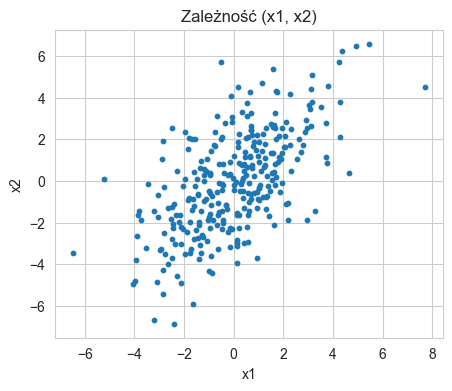

In [12]:
# Wykres rozrzutu (x1, x2)
plt.figure(figsize=(5, 4))
plt.scatter(df['x1'], df['x2'], s=10)  # s=10, mniejsze kropki
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Zależność (x1, x2)")
plt.show()

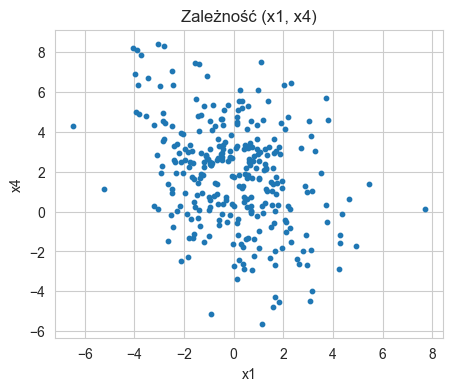

In [13]:
# Wykres rozrzutu (x1, x4)
plt.figure(figsize=(5, 4))
plt.scatter(df['x1'], df['x4'], s=10)  # s=10, mniejsze kropki
plt.xlabel("x1")
plt.ylabel("x4")
plt.title("Zależność (x1, x4)")
plt.show()

## Analiza składowych głownych - (PCA)


### standaryzacja + PCA

In [14]:
# Standaryzujemy dane (mean=0, std=1)
# jest wrażliwe na skalę
scaler = StandardScaler()
Z = scaler.fit_transform(df)


In [15]:
# uruchamiamy pca na 4 składowe
pca = PCA(n_components=4, random_state=42)
Z_pca = pca.fit_transform(Z)

In [16]:
exp_var = pca.explained_variance_ratio_  # udział wariancji wyjasnionej
loadings = pca.components_.T  # ładunki, wiersze=zmienne

In [17]:
print(f"Udziały wariancji wyjaśnionej: {np.round(exp_var, 3)} ")
print(f"Suma: {np.round(exp_var.sum(), 3)} ")
print(f"Ładunki (wiersze=zmienne, kolumny=PC): {np.round(loadings, 3)}")

Udziały wariancji wyjaśnionej: [0.489 0.321 0.108 0.082] 
Suma: 1.0 
Ładunki (wiersze=zmienne, kolumny=PC): [[-0.541  0.432 -0.419  0.588]
 [-0.512  0.463  0.625 -0.365]
 [ 0.377  0.662 -0.453 -0.463]
 [ 0.551  0.401  0.479  0.554]]


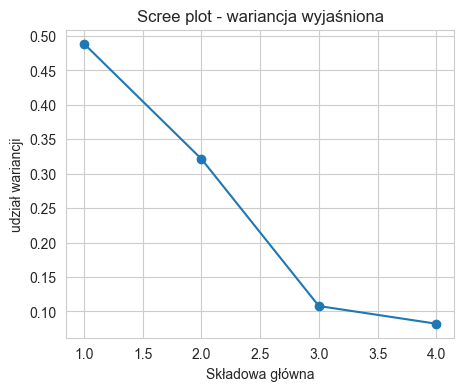

In [18]:
# wykres udziałów wariancji - każda kropka to kolejna składowa
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(exp_var) + 1), exp_var, marker="o")
plt.xlabel("Składowa główna")
plt.ylabel("udział wariancji")
plt.title("Scree plot - wariancja wyjaśniona")
plt.show()

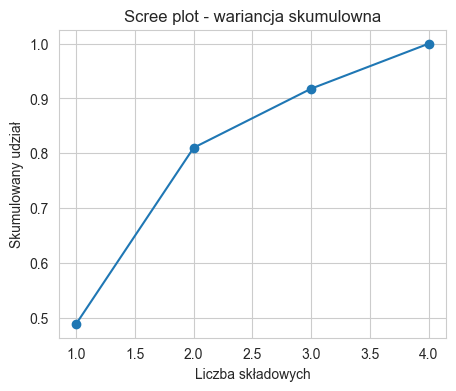

In [19]:
# wykres skumulowanej wariancji
cum = np.cumsum(exp_var)

plt.figure(figsize=(5, 4))
plt.plot(range(1, len(cum) + 1), cum, marker="o")
plt.xlabel("Liczba składowych")
plt.ylabel("Skumulowany udział")
plt.title("Scree plot - wariancja skumulowna")
plt.show()

## Biplot (PC1-PC2): punkty + wektory ładunków
Zobaczymy jak dane ukłądają się w przestrzeni  i które zmienne dominują

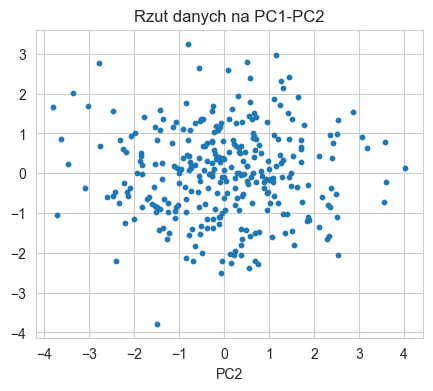

In [20]:
pc1 = Z_pca[:, 0]
pc2 = Z_pca[:, 1]

# wykresy punktów, tylko punkty)
plt.figure(figsize=(5, 4))
plt.scatter(pc1, pc2, s=10)
plt.xlabel("PC1")
plt.xlabel("PC2")
plt.title("Rzut danych na PC1-PC2")
plt.show()

## Wektory ładunków

In [25]:
L = loadings[:, :2]
scale = 2.0 / np.max(np.abs(L))

Text(0.5, 1.0, 'Wektory ładunków (biplot - wektory)')

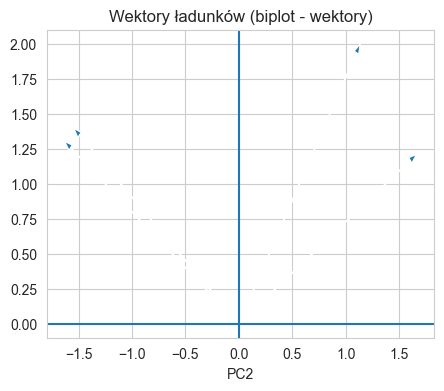

In [26]:
plt.figure(figsize=(5, 4))
plt.axhline(0)  # osie pomocnicze
plt.axvline(0)

for i, name in enumerate(df.columns):
    x, y = L[i, 0] * scale, L[i, 1] * scale
    plt.arrow(0, 0, x, y, head_width=0.05, length_includes_head=True)
    plt.text=(x*1.05, y*1.05, name)

plt.xlabel("PC1")
plt.xlabel("PC2")
plt.title("Wektory ładunków (biplot - wektory)")